In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

df = pd.read_csv('/content/drive/MyDrive/PAN12/csv/PAN12-train.csv')

In [ ]:
df['segment'].fillna('', inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['segment'], df['label'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/PAN12/csv/PAN12-test.csv')
test_df['segment'].fillna('', inplace=True)

In [ ]:
test_input = vectorizer.transform(test_df['segment'])

# SVM

In [ ]:
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
svm.fit(X_train_vec, y_train)

In [ ]:
y_pred = svm.predict(X_test_vec)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100}%')

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train_vec, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = tree.predict(X_test_vec)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100}%')

Accuracy: 96.87733452861198%


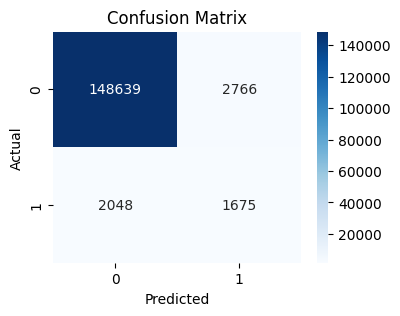

Accuracy: 0.9689675622711568
Precision: [0.98640891 0.3771673 ]
Recall: [0.98173112 0.44990599]
F1 Score: [0.98406446 0.41033807]


In [ ]:
display_classification_metrics(tree, tree.predict(test_input), test_df['label'])

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train_vec, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred = clf.predict(X_test_vec)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100}%')

# Multinomial

In [ ]:
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

MultinomialNB()

In [ ]:
y_pred = clf.predict(X_test_vec)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100}%')

Accuracy: 97.49738532795458%


In [ ]:
accuracy = accuracy_score(clf.predict(test_input), test_df['label'])
print(f'Accuracy: {accuracy * 100}%')

Accuracy: 97.59424475272034%


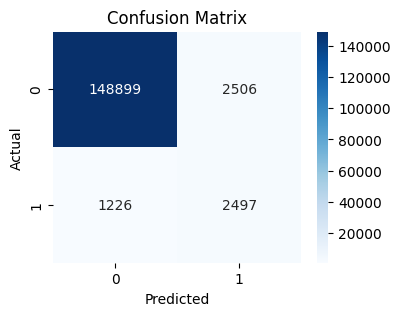

Accuracy: 0.9759424475272034
Precision: [0.99183347 0.49910054]
Recall: [0.98344837 0.67069568]
F1 Score: [0.98762312 0.57231263]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def display_classification_metrics(model, y_pred, y_actual):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_actual, y_pred)

    # Visualize the confusion matrix
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    labels = ['non-predator', 'predator']

    # Display accuracy
    print("Accuracy:", accuracy_score(y_actual, y_pred))

    # Display precision
    print("Precision:", precision_score(y_actual, y_pred, labels=labels, average=None))

    # Display recall
    print("Recall:", recall_score(y_actual, y_pred, labels=labels, average=None))

    # Display F1 score
    print("F1 Score:", f1_score(y_actual, y_pred, labels=labels, average=None))

display_classification_metrics(clf, clf.predict(test_input), test_df['label'])

# Confusion Matrix

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues, filename=None):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.imsave(filename, cm, cmap=cmap)

#Picklizing

In [ ]:
import pickle

with open('/content/drive/MyDrive/PAN12/model/vectorizer.pickle', 'wb') as f:
    pickle.dump(vectorizer, f)

In [ ]:
import pickle

with open('/content/drive/MyDrive/PAN12/model/clf.pickle', 'wb') as f:
    pickle.dump(clf, f)